# Classification Problem Analysis
Arthur: Leon Lai

Sharing the great kernel before getting started:

[Exploratory data analysis and feature extraction with Python](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python) by **Pedro Marcelino**

Similar to deal with the regression problem, we'll do some data analysis step by step and build some models for predictions.

## Load Data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

import warnings
warnings.filterwarnings('ignore')

In [61]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Primary analysis
Use **.head()** to check if the data was loaded correctly.

Use **.info()** to get some summary of dataset with the information about missing data and feature types.

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Here summarize the data description from Kaggle below:**

* **Survived**. Survival (0 = No, 1 = Yes).
* **Pclass**. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). 
* **Name**. Name of the passenger.
* **Sex**. Sex.
* **Age**. Age in years.
* **SibSp**. # of siblings / spouses aboard the Titanic.
* **Parch**. # of parents / children aboard the Titanic.
* **Ticket**. Ticket number.
* **Fare**. Passenger fare.
* **Cabin**. Cabin number.
* **Embarked**. Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Data Engineering
Here are the steps we'll do for data analysis below:

1. **Handle missing data**: Delete or fill them based on the analysis.
2. **Exploratory data analysis**: Perform the analysis step by step for each feature.
3. **Handle categorical features**: Create dummy variables (one-hot-encoding) for them.
4. **Data scaling**: Make the numeric features have the same scale help the optimization.

### Handle missing data

In [66]:
miss_count = train.isnull().sum()
per = train.isnull().sum() / len(train)
miss = pd.concat([miss_count,per],axis=1,keys=['miss_count', 'percetage'])
miss.sort_values('miss_count',ascending = False)

,miss_count,percetage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


'Cabin' has more than 75% missing data. We need to delete it.

For 'Age' feature, it should be an important feature to impact if the person was survived or not. We need to find a way to fill out the missing data.

As for 'Embarked', it should not impact the 'Survived' feature. Let's check it in EDA section.

In [67]:
train.drop('Cabin',axis=1,inplace=True)

Check test dataset as well.

In [68]:
miss_count_test = test.isnull().sum()
per_test = test.isnull().sum() / len(test)
miss_test = pd.concat([miss_count_test,per_test],axis=1,keys=['miss_count', 'percetage'])
miss_test.sort_values('miss_count',ascending = False)

,miss_count,percetage
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


Delete 'Cabin' as well.

In [69]:
test.drop('Cabin',axis=1,inplace=True)

In [70]:
all_data = pd.concat([train,test])

#### Fill in the missing data for 'Age' feature.

We can easily use mean or median to fill the missing data. However, it seems that we can check the tilte of name to evalute the person's age. That may make more sense! 

In [71]:
all_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

* The rule seems to be: 'name' + ',' + **'title'** + 'other names'

Use **Regular Expression** to extract the 'Title' from 'Name'.

In [72]:
all_data['Title']=0
for i in all_data:
    all_data['Title']=all_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)  

In [73]:
all_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

Check the mean of 'Age' for each 'Title' by using **seaborn.barplot()**

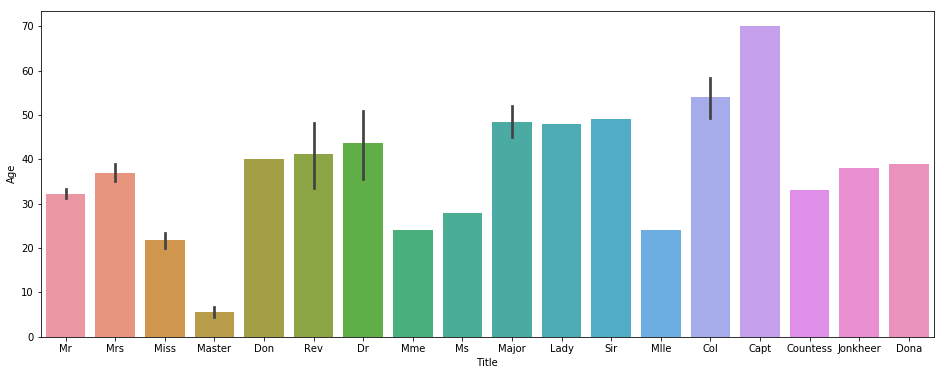

In [74]:
plt.figure(figsize=(16,6))
sns.barplot(x=all_data['Title'], y=all_data['Age']);

Except Rev and Dr, which have a larger error bar, the others can be represented accurately by the mean value. So we'll use the mean value to fill the missing data of 'Age' based on each 'Title' 

In [75]:
means = all_data.groupby('Title')['Age'].mean()
means

Title
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [76]:
map_title_age_means = means.to_dict()
map_title_age_means

{'Capt': 70.0,
 'Col': 54.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dona': 39.0,
 'Dr': 43.57142857142857,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 5.482641509433963,
 'Miss': 21.774238095238097,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.25215146299484,
 'Mrs': 36.99411764705882,
 'Ms': 28.0,
 'Rev': 41.25,
 'Sir': 49.0}

In [77]:
idx_missing_age = all_data.loc[np.isnan(all_data['Age'])].index
all_data.loc[idx_missing_age,'Age'] = all_data['Title'].loc[idx_missing_age].map(map_title_age_means)

In [78]:
all_data['Age'].isnull().sum()

0

Fill the one missing data of 'Fare' based on 'Pclass'.

In [79]:
map_pclass_fare_means = all_data.groupby('Pclass')['Fare'].mean().to_dict()
idx_missing_fare = all_data[all_data['Fare'].isnull()].index
all_data.loc[idx_missing_fare,'Fare'] = all_data['Pclass'].loc[idx_missing_fare].map(map_pclass_fare_means)

### Exploratory data analysis

Drop the features 'Name','PassengerId','Ticket' which should not impact the result.

In [80]:
all_data = all_data.drop(['Name','PassengerId','Ticket'],axis=1)

In [81]:
all_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,7.2500,0,3,male,1,0.0,Mr
1,38.0,C,71.2833,0,1,female,1,1.0,Mrs
2,26.0,S,7.9250,0,3,female,0,1.0,Miss
3,35.0,S,53.1000,0,1,female,1,1.0,Mrs
4,35.0,S,8.0500,0,3,male,0,0.0,Mr


Combine 'Parch' & 'SibSp' into 'FamilyNum'.

In [82]:
all_data['FamilyNum'] = all_data['Parch'] + all_data['SibSp']

In [83]:
all_data = all_data.drop(['Parch','SibSp'],axis=1)

In [84]:
train_new = all_data.iloc[0:train.shape[0],:]
test_new = all_data.iloc[train.shape[0]:,:]

In [85]:
test_new = test_new.drop('Survived',axis=1)

#### Pclass

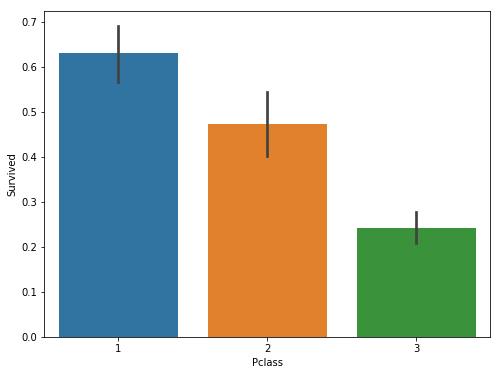

In [86]:
sns.barplot(train_new['Pclass'],train_new['Survived']);

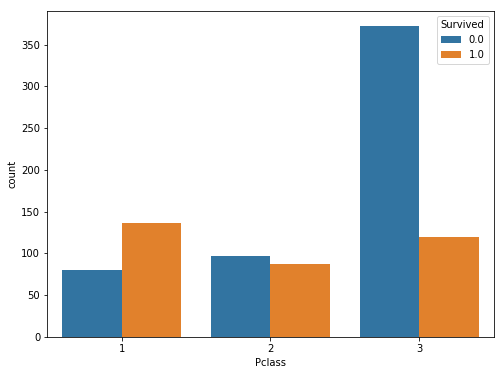

In [87]:
sns.countplot(train_new['Pclass'],hue=train_new['Survived']);

Obviously, the diagrams (~60% of the people travelling in the first class survived) mention that the class where the person travel affects the chances of survival.

In [88]:
all_data['Pclass'] = pd.Categorical(all_data['Pclass'])

#### Title (of the Name)

In [89]:
all_data['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Don           1
Capt          1
Jonkheer      1
Mme           1
Dona          1
Sir           1
Countess      1
Lady          1
Name: Title, dtype: int64

We can see four groups ('Mr','Mrs','Miss','Master') have many people, which will be kept as main groups.
Then, we can try to combine some similar groups into main groups. The remaining will be put into 'Others' group.

In [90]:
titles_dict = {'Capt': 'Others',
               'Col': 'Others',
               'Countess': 'Mrs',
               'Don': 'Mr',
               'Dr': 'Others',
               'Jonkheer': 'Others',
               'Lady': 'Miss',
               'Major': 'Others',
               'Master': 'Master',
               'Miss': 'Miss',
               'Mlle': 'Miss',
               'Mme': 'Mrs',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Ms': 'Miss',
               'Rev': 'Others',
               'Sir': 'Others',
               'Dona': 'Mrs'
               }

In [91]:
all_data['Title'] = all_data['Title'].map(titles_dict)

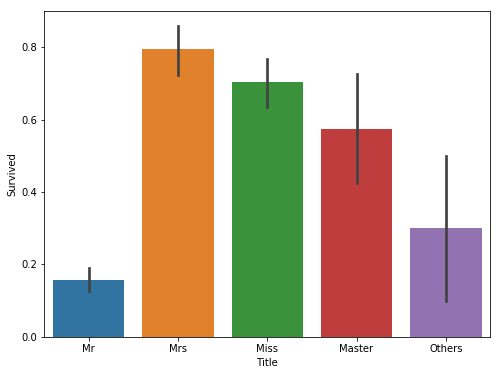

In [92]:
sns.barplot(train_new['Title'],train_new['Survived']);

#### Sex

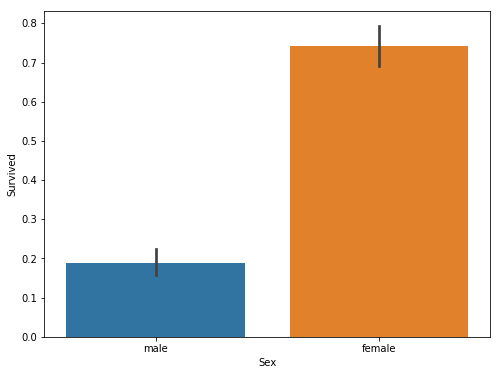

In [93]:
sns.barplot(train_new['Sex'],train_new['Survived']);

The women's survival rate is higher than men's. It makes sense.

#### Age

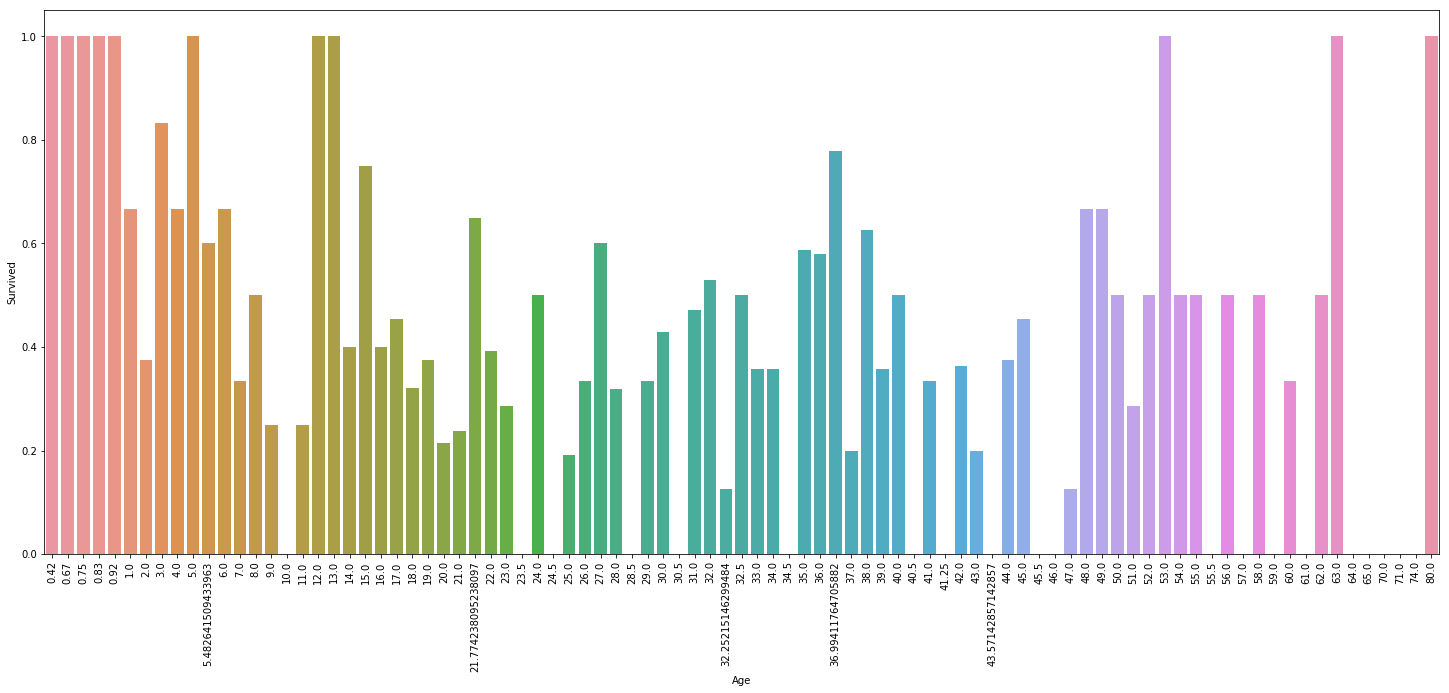

In [94]:
plt.figure(figsize=(25,10))
sns.barplot(train_new['Age'],train_new['Survived'], ci=None)
plt.xticks(rotation=90);

By checking the diagram, maybe we can separate the 'Age' into three groups in intuition:

* 'Child': 0 ~ 15
* 'Adult': 16 ~ 47
* 'Old': 47 ~

In [95]:
all_data['Age'] = pd.cut(all_data['Age'], bins=[0, 16, 48, 100], labels=['Child','Adult','Old'])

In [96]:
all_data['Age']

0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
5      Adult
6        Old
7      Child
8      Adult
9      Child
10     Adult
11       Old
12     Adult
13     Adult
14     Child
15       Old
16     Child
17     Adult
18     Adult
19     Adult
20     Adult
21     Adult
22     Adult
23     Adult
24     Child
25     Adult
26     Adult
27     Adult
28     Adult
29     Adult
       ...  
388    Adult
389    Child
390    Adult
391      Old
392    Child
393    Adult
394    Adult
395    Adult
396    Adult
397    Adult
398    Adult
399    Adult
400    Adult
401    Adult
402    Adult
403    Adult
404    Adult
405    Adult
406    Adult
407      Old
408    Adult
409    Adult
410    Adult
411    Adult
412    Adult
413    Adult
414    Adult
415    Adult
416    Adult
417    Child
Name: Age, Length: 1309, dtype: category
Categories (3, object): [Child < Adult < Old]

#### FamilyNum

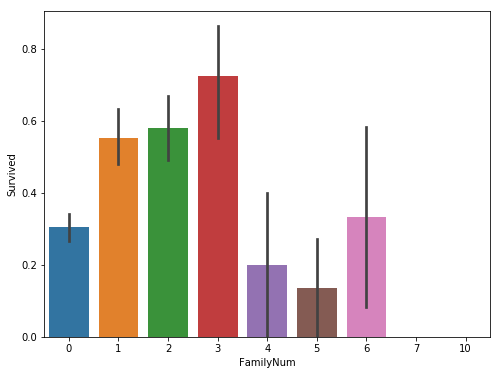

In [97]:
sns.barplot(train_new['FamilyNum'], train_new['Survived']);

Not more people have more survival rate. Just keep the feature without change.

#### Fare

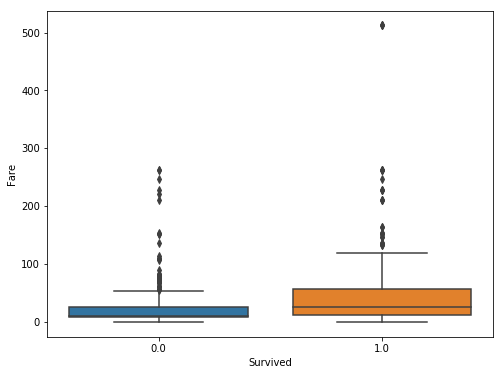

In [98]:
sns.boxplot(train_new['Survived'], train_new['Fare']);

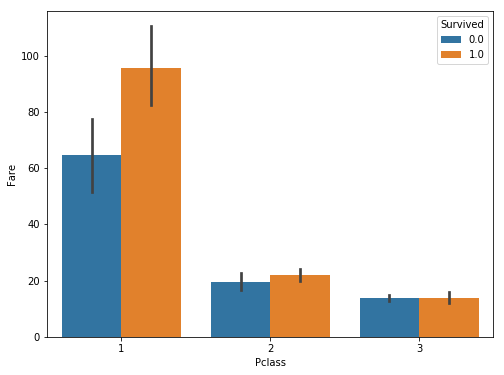

In [99]:
sns.barplot(train_new['Pclass'], train_new['Fare'], train_new['Survived']);

Seems that no significant change between Pclass 2 and 3. However, in Pclass 1, you pay more money, more survival rate.

Let's make the feature become normal. 

A box-cox transformation is a way to transform non-normal dependent variables into a normal shape. (log-transformation is the unique type in box-cox transformation)

$$
\large y({\lambda}) = 
\begin{cases}
\frac{y^{\lambda} - 1}{\lambda}, & {\lambda} {\space}{ \neq} {\space}0 \\
ln(y), & {\lambda}=0
\end{cases}
$$

In [100]:
from scipy.stats import boxcox

In [101]:
all_data_transformed = all_data.copy()

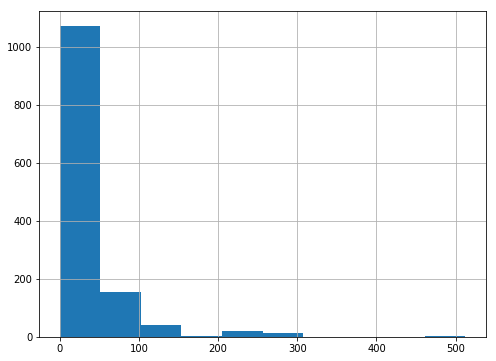

In [102]:
all_data['Fare'].hist()

In [103]:
all_data_transformed['Fare'] = boxcox(all_data['Fare']+1)[0]

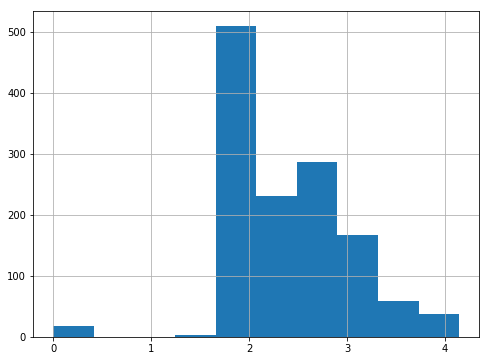

In [104]:
all_data_transformed['Fare'].hist()

#### Embarked

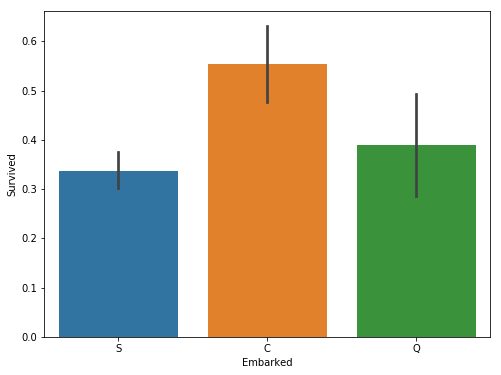

In [105]:
sns.barplot(train_new['Embarked'], train_new['Survived']);

It seems that the people whose port of embarkation at 'Cherbourg' have higher survival rate. It's strange. We need to check if anything impact the survival behind it.

In [106]:
train_new.groupby('Embarked').mean()

,Age,Fare,Pclass,Survived,FamilyNum
Embarked,,,,,
C,30.603247,59.954144,1.886905,0.553571,0.750000
Q,27.157898,13.276030,2.909091,0.389610,0.597403
S,29.830191,27.087968,2.350932,0.336957,0.984472


We see the people whose port of embarkation at 'Cherbourg' pay more money (higher Plcass & Fare). That makes sense.

In [107]:
pd.crosstab(train_new['Embarked'], train_new['Sex'])

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


In [108]:
pd.crosstab(train_new['Embarked'], train_new['Title'])

Title,Master,Miss,Mr,Mrs,Others
Embarked,,,,,
C,5,41,86,32,4
Q,4,33,35,3,2
S,31,111,397,91,14


No significant change with 'Sex' & 'Title'.

Since it should be no impact to the result with 'Embarked' in our assumption. However, I decide to keep it for observation. 

### Handle categorical features

Combine the train and test dataset for handling.

In [109]:
all_data_transformed_dummy = pd.get_dummies(all_data_transformed, drop_first=True)  

In [110]:
all_data_transformed_dummy.head()

,Fare,Survived,FamilyNum,Age_Adult,Age_Old,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,1.824724,0.0,1,1,0,0,1,0,1,1,0,1,0,0
1,3.212059,1.0,1,1,0,0,0,0,0,0,0,0,1,0
2,1.882771,1.0,0,1,0,0,1,0,1,0,1,0,0,0
3,3.050504,1.0,1,1,0,0,1,0,0,0,0,0,1,0
4,1.892970,0.0,0,1,0,0,1,0,1,1,0,1,0,0


In [111]:
train_final = all_data_transformed_dummy.iloc[:train.shape[0]]
test_final = all_data_transformed_dummy.iloc[train.shape[0]:]

In [112]:
X_train = train_final.drop('Survived',axis=1)
y_train = train_final['Survived']
X_test = test_final.drop('Survived',axis=1)

In [113]:
X_train.head()

,Fare,FamilyNum,Age_Adult,Age_Old,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,1.824724,1,1,0,0,1,0,1,1,0,1,0,0
1,3.212059,1,1,0,0,0,0,0,0,0,0,1,0
2,1.882771,0,1,0,0,1,0,1,0,1,0,0,0
3,3.050504,1,1,0,0,1,0,0,0,0,0,1,0
4,1.892970,0,1,0,0,1,0,1,1,0,1,0,0


### Data scaling
Do the MinMax Scaling for the numeric features since most other feature are non-numeric:

$$ \large X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}} $$

The transformation make all the features between 0 ~ 1.

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train)
X_test_transformed_scaled = scaler.transform(X_test)

In [115]:
X_train_transformed_scaled

array([[0.43997493, 0.1       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.77448717, 0.1       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.45397108, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.62021544, 0.3       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65604503, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.45046143, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

## Build the models
**Logistic Regression**

In [116]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5,random_state=66,shuffle=True)

Use the LogisticRegressionCV to find the best hyperparameter => C = 10

In [117]:
#model_lr = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100],cv=skf, n_jobs=-1, verbose=True, scoring='accuracy')

In [118]:
#model_lr.C_

In [119]:
model_lr = LogisticRegression(C=10)

In [120]:
model_lr.fit(X_train_transformed_scaled, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
cross_val_score(model_lr,X=X_train_transformed_scaled,y=y_train,scoring='accuracy',cv=skf)

array([0.83798883, 0.80446927, 0.83707865, 0.78651685, 0.86440678])

**Random Forest**

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Use GridSearchCV to find the best hyperparameters. 
* max_depth=6
* max_features=9
* min_samples_leaf=2

In [123]:
#model_rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1,random_state=66)

In [124]:
'''
rf_params = {'max_depth': range(3,8),
               'max_features': range(5,11),
            'min_samples_leaf': range(1,4)}
               
rf_grid = GridSearchCV(model_rf, rf_params,
                         cv=skf, n_jobs=-1, verbose=True, scoring = 'accuracy')

rf_grid.fit(X_train_transformed_scaled, y_train)

rf_grid.best_params_
'''

"\nrf_params = {'max_depth': range(3,8),\n               'max_features': range(5,11),\n            'min_samples_leaf': range(1,4)}\n               \nrf_grid = GridSearchCV(model_rf, rf_params,\n                         cv=skf, n_jobs=-1, verbose=True, scoring = 'accuracy')\n\nrf_grid.fit(X_train_transformed_scaled, y_train)\n\nrf_grid.best_params_\n"

In [125]:
#rf_grid.best_score_

In [126]:
model_rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1,random_state=66,max_depth=6,max_features=9,min_samples_leaf=2)

In [127]:
model_rf.fit(X_train_transformed_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=66, verbose=0,
                       warm_start=False)

In [128]:
cross_val_score(model_rf,X=X_train_transformed_scaled,y=y_train,scoring='accuracy',cv=skf)

array([0.87709497, 0.8603352 , 0.83707865, 0.84269663, 0.88135593])

**SVM**

In [129]:
from sklearn.svm import SVC

In [130]:
model_svc = SVC(random_state = 66,C=10,degree=2,gamma=10,kernel='poly') #run the CV already

In [131]:
model_svc.fit(X_train_transformed_scaled, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=66, shrinking=True, tol=0.001,
    verbose=False)

**Combine the models with voting**

In [134]:
from sklearn.ensemble import VotingClassifier

In [135]:
model_vc = VotingClassifier([('lr', model_lr), ('rf',model_rf), ('svc',model_svc)])

In [136]:
model_vc.fit(X_train_transformed_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                            

## Predict and do the submission

In [137]:
sub = pd.read_csv('gender_submission.csv')

In [138]:
lr_pred = model_lr.predict(X_test_transformed_scaled)
sub['Survived'] = lr_pred
sub['Survived'] = sub['Survived'].astype('int64')
sub.to_csv('lr.csv',index=False)

The accuracy of Logistic Regression is **79.90%**

In [139]:
rf_pred = model_rf.predict(X_test_transformed_scaled)
sub['Survived'] = rf_pred
sub['Survived'] = sub['Survived'].astype('int64')
sub.to_csv('rf.csv',index=False)

The accuracy of Random Forest is **79.90%**

In [140]:
svc_pred = model_svc.predict(X_test_transformed_scaled)
sub['Survived'] = svc_pred
sub['Survived'] = sub['Survived'].astype('int64')
sub.to_csv('svc.csv',index=False)

The accuracy of SVM is **80.86%**

In [141]:
vc_pred = model_vc.predict(X_test_transformed_scaled)
sub['Survived'] = vc_pred
sub['Survived'] = sub['Survived'].astype('int64')
sub.to_csv('vc.csv',index=False)

The accuracy is **81.34%**!